In [1]:
# importing all necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import plot_roc_curve

In [2]:
# display max rows and columns
pd.set_option('display.max_columns', 100)
pd.set_option('display.min_rows', 200)

In [3]:
# importing dataset
dataset = pd.read_csv('train_s3TEQDk.csv')
dataset_test = pd.read_csv('test_mSzZ8RL.csv')

df = pd.read_csv('train_s3TEQDk.csv')
test_df = pd.read_csv('test_mSzZ8RL.csv')

In [4]:
df.set_index('ID',inplace=True)
test_df.set_index('ID',inplace=True)

In [5]:
df.columns
cat_var = ['Gender','Region_Code','Occupation','Channel_Code','Is_Active','Credit_Product','Is_Lead']
num_var = ['Age','Vintage','Avg_Account_Balance',]

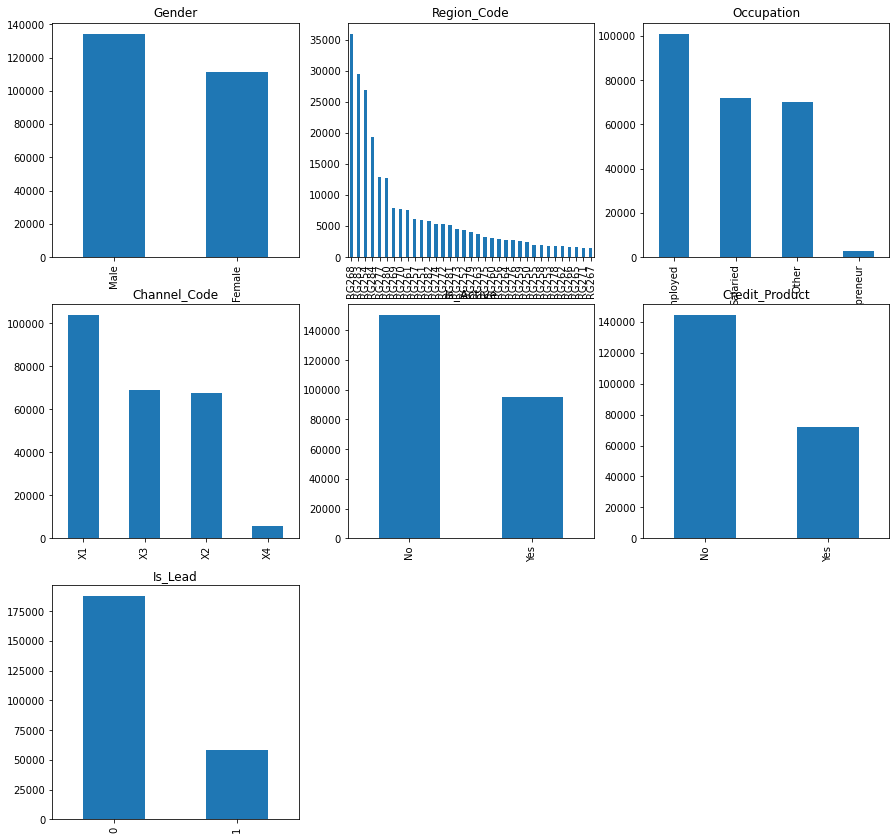

In [6]:
plt.figure(figsize=(15,25))
for i in enumerate(cat_var):
    plt.subplot(5, 3, i[0]+1)
    df[i[1]].value_counts().plot(kind='bar')
    plt.title(i[1])

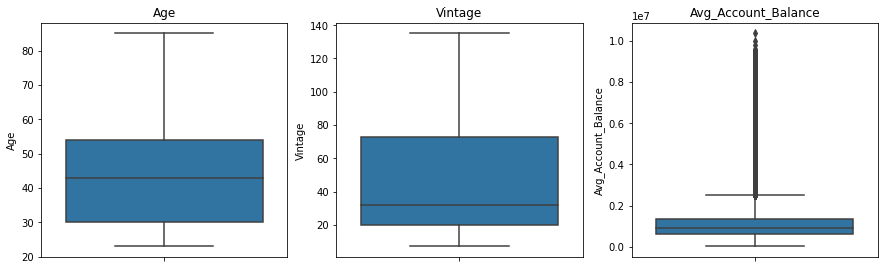

In [7]:
plt.figure(figsize=(15,25))
for i in enumerate(num_var):
    plt.subplot(5, 3, i[0]+1)
    sns.boxplot(y=i[1],data=df)
    plt.title(i[1])

In [8]:
# missing value imputation
df.Credit_Product = df.Credit_Product.fillna('Unknown')
test_df.Credit_Product = test_df.Credit_Product.fillna('Unknown')

C:\Users\91882\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91882\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

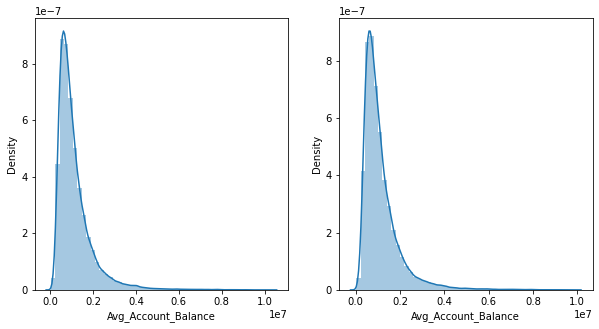

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2, 1)
sns.distplot(df["Avg_Account_Balance"])
plt.subplot(1,2, 2)
sns.distplot(test_df["Avg_Account_Balance"])

C:\Users\91882\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91882\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

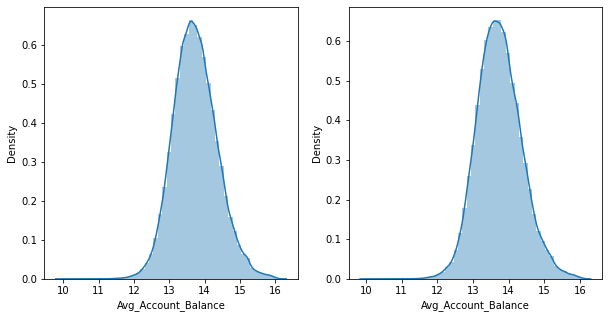

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2, 1)
sns.distplot(np.log(df["Avg_Account_Balance"]))
plt.subplot(1,2, 2)
sns.distplot(np.log(test_df["Avg_Account_Balance"]))

In [11]:
df["Avg_Account_Balance"] = np.log(df["Avg_Account_Balance"])
test_df["Avg_Account_Balance"] = np.log(test_df["Avg_Account_Balance"])

df["Vintage"] = np.log(df["Vintage"])
test_df["Vintage"] = np.log(test_df["Vintage"])

df["Age"] = np.log(df["Age"])
test_df["Age"] = np.log(test_df["Age"])

In [12]:
# creating dummy
df1 = df.copy()
for i in cat_var[:-2]:
    temp = pd.get_dummies(df[i], prefix=i,drop_first=True)
    df1 = pd.concat([df1,temp], axis=1)
    df1 = df1.drop(i,axis=1)
    
print(df1.shape)  

for i in cat_var[:-2]:
    temp = pd.get_dummies(test_df[i], prefix=i,drop_first=True)
    test_df = pd.concat([test_df,temp], axis=1)
    test_df = test_df.drop(i,axis=1)
    
print(test_df.shape)


temp = pd.get_dummies(df['Credit_Product'], prefix='Credit_Product',drop_first=False)
temp = temp.drop('Credit_Product_Unknown',axis=1)
df1 = pd.concat([df1,temp], axis=1)
df1 = df1.drop('Credit_Product',axis=1)

temp = pd.get_dummies(test_df['Credit_Product'], prefix='Credit_Product',drop_first=False)
temp = temp.drop('Credit_Product_Unknown',axis=1)
test_df = pd.concat([test_df,temp], axis=1)
test_df = test_df.drop('Credit_Product',axis=1)

(245725, 47)
(105312, 46)


In [13]:
df1.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_Yes,Credit_Product_No,Credit_Product_Yes
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NNVBBKZB,4.290459,3.761200,13.860193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
IDD62UNG,3.401197,3.465736,13.274205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
HD3DSEMC,4.025352,3.258097,14.210464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
BF3NC7KV,3.526361,2.944439,13.061453,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
TEASRWXV,3.401197,3.496508,13.695360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [14]:
test_df.head()

,Age,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_Yes,Credit_Product_No,Credit_Product_Yes
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VBENBARO,3.367296,3.218876,13.517598,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
CCMEWNKY,3.761200,3.891820,13.738129,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
VK3KGA9M,3.433987,2.639057,12.282798,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
TT8RPZVC,3.367296,3.496508,13.674028,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
SHQZEYTZ,3.367296,2.944439,13.395572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [15]:
# Putting Target variable to y
y = df1['Is_Lead']
print(y.head())
X = df1.drop('Is_Lead',axis=1)

# Putting Target variable to y
#y_test = test_df['Is_Lead']
#print(y_test.head())
X_test = test_df

ID
NNVBBKZB    0
IDD62UNG    0
HD3DSEMC    0
BF3NC7KV    0
TEASRWXV    0
Name: Is_Lead, dtype: int64


In [16]:
# Scaling

scaler = StandardScaler()
X[['Age','Vintage','Avg_Account_Balance']] = scaler.fit_transform(X[['Age','Vintage','Avg_Account_Balance']])
X.head()
#print(X.shape)

X_Scaled = X.copy() # copy for future use

# Scaling test
X_test[['Age','Vintage','Avg_Account_Balance']] = scaler.transform(X_test[['Age','Vintage','Avg_Account_Balance']])
X_test.head()
#print(X.shape)

X_test_Scaled = X_test.copy() # copy for future use

In [17]:
logreg = LogisticRegression()

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X, y)

rfe.support_

C:\Users\91882\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\91882\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91882\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [18]:
col = X.columns[rfe.support_]
X.columns[~rfe.support_]

Index(['Avg_Account_Balance', 'Gender_Male', 'Region_Code_RG251',
       'Region_Code_RG252', 'Region_Code_RG253', 'Region_Code_RG254',
       'Region_Code_RG255', 'Region_Code_RG256', 'Region_Code_RG257',
       'Region_Code_RG258', 'Region_Code_RG259', 'Region_Code_RG260',
       'Region_Code_RG261', 'Region_Code_RG262', 'Region_Code_RG264',
       'Region_Code_RG265', 'Region_Code_RG266', 'Region_Code_RG268',
       'Region_Code_RG270', 'Region_Code_RG271', 'Region_Code_RG272',
       'Region_Code_RG273', 'Region_Code_RG274', 'Region_Code_RG275',
       'Region_Code_RG276', 'Region_Code_RG277', 'Region_Code_RG278',
       'Region_Code_RG280', 'Region_Code_RG281', 'Region_Code_RG282',
       'Region_Code_RG283', 'Region_Code_RG284'],
      dtype='object')

In [19]:
X = sm.add_constant(X[col])
logm1 = sm.GLM(y,X, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Is_Lead   No. Observations:               245725
Model:                            GLM   Df Residuals:                   245709
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -90093.
Date:                Sun, 30 May 2021   Deviance:                   1.8019e+05
Time:                        23:39:45   Pearson chi2:                 2.56e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2224      0.052     23.595      0.000       1.121       1.324
Age                          0.2230      0.011     19.931      0.000       0.201       0.245
Vintage                      0.2602      0.008     30.870      0.000       0.244       0.277
Region_Code_RG263            0.1647      0.050      3.274      0.001       0.066       0.263
Region_Code_RG267           -0.3289      0.088     -3.720      0.000      -0.502      -0.156
Region_Code_RG269            0.1275      0.036      3.584      0.000       0.058       0.197
Region_Code_RG279            0.1314      0.048      2.729      0.006       0.037       0.226
Occupation_Other            -0.8087      0.048    -16.802      0.000      -0.903      -0.714
Occupation_Salaried          0.2757      0.050      5.495      0.000       0.177       0.374
Occupation_Self_Employed    -0.6816      0.047    -14.476      0.000      -0.774      -0.589
Channel_Code_X2              0.8779      0.022     40.194      0.000       0.835       0.921
Channel_Code_X3              0.7759      0.023     33.826      0.000       0.731       0.821
Channel_Code_X4              0.9039      0.042     21.294      0.000       0.821       0.987
Is_Active_Yes                0.3446      0.013     26.750      0.000       0.319       0.370
Credit_Product_No           -3.9845      0.020   -198.583      0.000      -4.024      -3.945
Credit_Product_Yes          -2.3647      0.019   -125.913      0.000      -2.402      -2.328
============================================================================================
"""

In [20]:
y_train_pred = res.predict(X)
y_train_pred[:10]

ID
NNVBBKZB    0.086345
IDD62UNG    0.059796
HD3DSEMC    0.095326
BF3NC7KV    0.053998
TEASRWXV    0.060437
ACUTYTWS    0.049750
ETQCZFEJ    0.829024
JJNJUQMQ    0.068572
ZMQFYKCB    0.070535
NVKTFBA2    0.342604
dtype: float64

In [21]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08634467, 0.05979628, 0.09532556, 0.05399815, 0.06043662,
       0.04975027, 0.82902376, 0.06857242, 0.07053497, 0.34260373])

In [22]:
## Train data
y_train_pred_final = pd.DataFrame({'Is_Lead':y.values, 'Is_Lead_Prob':y_train_pred})
y_train_pred_final['ID'] = y.index
y_train_pred_final.set_index('ID',inplace=True)
y_train_pred_final.head(10)

,Is_Lead,Is_Lead_Prob
ID,,
NNVBBKZB,0,0.086345
IDD62UNG,0,0.059796
HD3DSEMC,0,0.095326
BF3NC7KV,0,0.053998
TEASRWXV,0,0.060437
ACUTYTWS,0,0.049750
ETQCZFEJ,1,0.829024
JJNJUQMQ,0,0.068572
ZMQFYKCB,0,0.070535


In [23]:
y_train_pred_final.shape

(245725, 2)

In [24]:
y_train_pred_final['predicted'] = y_train_pred_final.Is_Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Is_Lead,Is_Lead_Prob,predicted
ID,,,
NNVBBKZB,0,0.086345,0
IDD62UNG,0,0.059796,0
HD3DSEMC,0,0.095326,0
BF3NC7KV,0,0.053998,0
TEASRWXV,0,0.060437,0
ACUTYTWS,0,0.049750,0
ETQCZFEJ,1,0.829024,1
JJNJUQMQ,0,0.068572,0
ZMQFYKCB,0,0.070535,0


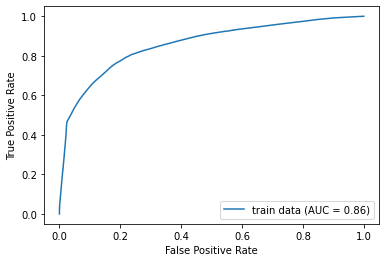

In [25]:
fpr, tpr, _ = roc_curve(y, y_train_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='train data').plot()

In [26]:
# Prediction On test daata
X_test = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test)
y_test_pred

ID
VBENBARO    0.088396
CCMEWNKY    0.805499
VK3KGA9M    0.045754
TT8RPZVC    0.020817
SHQZEYTZ    0.017052
MZZAQMPT    0.117382
Y88TW36I    0.106075
3UGOAQNU    0.060437
VVUKMUJT    0.949460
9R363ZXS    0.317029
BLISM6JE    0.060437
CH8S7JK7    0.310961
EAHDPXEJ    0.840026
BNUK9PRF    0.259103
GP2PG6FJ    0.059142
WNQCSN8A    0.026114
32DN4YVZ    0.435753
GXAMDANM    0.053719
MXETLUP4    0.146917
MPXK6TVE    0.883879
LBSIME2K    0.141827
D6ORJTM6    0.050127
HGDIBAKA    0.878516
UUZYL9DZ    0.364523
AUGE3VWK    0.039858
MX7GOX6Q    0.091148
TQN6K35W    0.087170
QQDRMQQN    0.489874
UP6GC6F4    0.042358
BMHBUVHB    0.443202
              ...   
WXCKEZFH    0.337395
KDCWVPK4    0.142337
FEXT5GEB    0.059796
ALZDO3IF    0.401882
GWVNNKSG    0.897680
C9QRCNCT    0.021050
B9TR6GTJ    0.051336
BQX4GGAZ    0.089553
D7DH2LVQ    0.018832
GZKGJAHF    0.368268
AHWSY2UR    0.098092
BKXWNJW4    0.340721
BVSPULT8    0.047478
SNHPAJMB    0.837955
KBX3FEW7    0.429502
9IVQKZDJ    0.055335
NUWRKTC5  

In [27]:
y_test_pred.reset_index(name='Is_Lead').to_csv('solution_cat_logistic.csv',index=False)

# CatBoost Classifier

In [28]:
dataset_test_copy = dataset_test.copy()

In [29]:
dataset_test_copy.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


<AxesSubplot:>

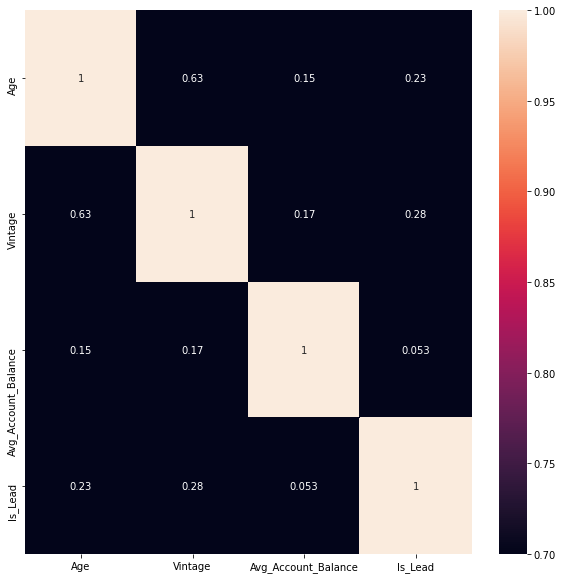

In [30]:
# finding correlation among the fields to remove unnecessary fields
dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,vmin=0.7)

<AxesSubplot:>

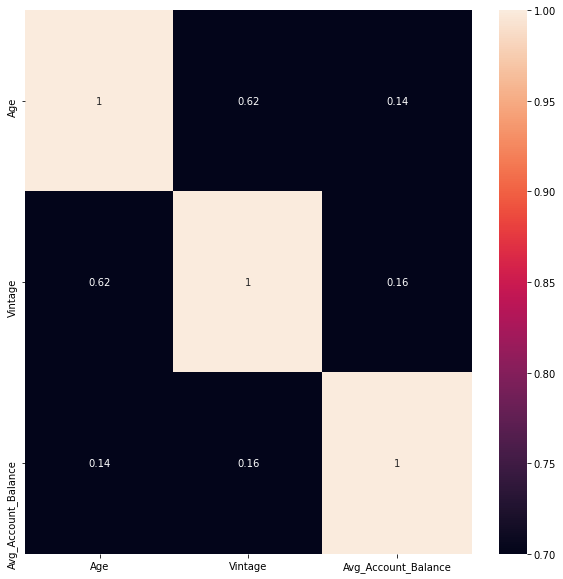

In [31]:
dataset_test.corr()
plt.figure(figsize=(10,10))
sns.heatmap(dataset_test.corr(),annot=True,vmin=0.7)

In [32]:
# this show only column projected verticaly on x-axis but it missed the field "Upper_Age" which is correlated
# to both the fields that is extracted in next cell 
def corrln(dataset, threshold):
    sete = set()
    for i in range(len(dataset.corr().columns)):
        for j in range(i):
            if abs(dataset.corr().iloc[i, j]) > threshold:
                col = dataset.corr().columns[i]
                sete.add(col)
    return sete

In [33]:
# this gives the fields that are highly correlated but one 
print(corrln(dataset, 0.7))
print(corrln(dataset_test, 0.7))

set()
set()


C:\Users\91882\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91882\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

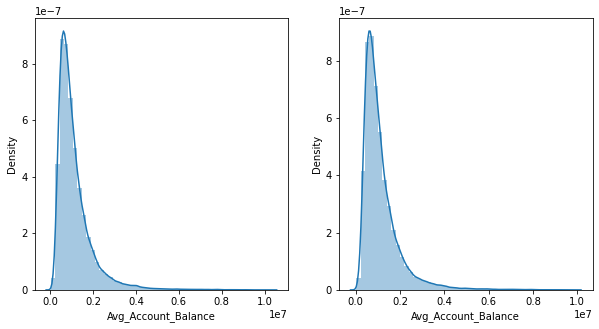

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2, 1)
sns.distplot(dataset["Avg_Account_Balance"])
plt.subplot(1,2, 2)
sns.distplot(dataset_test["Avg_Account_Balance"])

C:\Users\91882\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91882\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

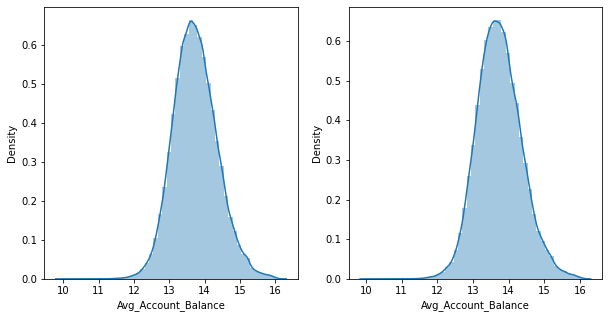

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2, 1)
sns.distplot(np.log(dataset["Avg_Account_Balance"]))
plt.subplot(1,2, 2)
sns.distplot(np.log(dataset_test["Avg_Account_Balance"]))

In [36]:
dataset["Avg_Account_Balance"] = np.log(dataset["Avg_Account_Balance"])
dataset_test["Avg_Account_Balance"] = np.log(dataset_test["Avg_Account_Balance"])

dataset["Vintage"] = np.log(dataset["Vintage"])
dataset_test["Vintage"] = np.log(dataset_test["Vintage"])

dataset["Age"] = np.log(dataset["Age"])
dataset_test["Age"] = np.log(dataset_test["Age"])

In [37]:
num_cols = dataset[['Age', 'Vintage', 'Avg_Account_Balance']]

C:\Users\91882\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91882\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91882\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

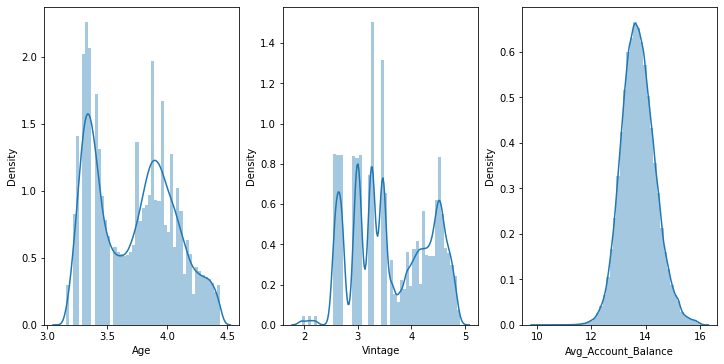

In [38]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(10, 5))
index = 0
ax = ax.flatten()

for col, value in num_cols.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

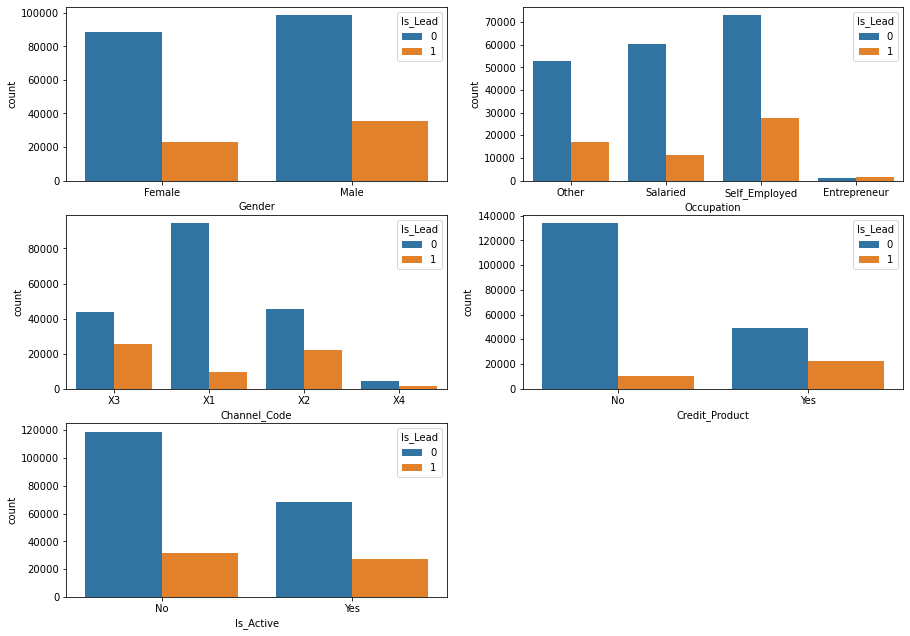

In [39]:
cols=['Gender','Occupation', 'Channel_Code', 'Credit_Product','Is_Active']

plt.figure(figsize=(15,30))
for i in enumerate(cols):
    plt.subplot(8,2, i[0]+1)
    sns.countplot(x=dataset[i[1]],hue=dataset['Is_Lead'])

<AxesSubplot:xlabel='Is_Lead', ylabel='Age'>

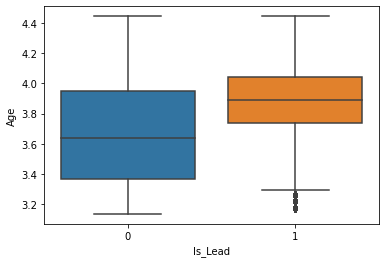

In [40]:
sns.boxplot(y=dataset['Age'], orient='v',x = dataset['Is_Lead'])

In [41]:
# fields containing null values
print(dataset.isnull().sum())
print('\n')
print(dataset_test.isnull().sum())

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64


ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64


In [42]:
print(dataset.head())
print('\n')
print(dataset_test.head())

         ID  Gender       Age Region_Code     Occupation Channel_Code  \
0  NNVBBKZB  Female  4.290459       RG268          Other           X3   
1  IDD62UNG  Female  3.401197       RG277       Salaried           X1   
2  HD3DSEMC  Female  4.025352       RG268  Self_Employed           X3   
3  BF3NC7KV    Male  3.526361       RG270       Salaried           X1   
4  TEASRWXV  Female  3.401197       RG282       Salaried           X1   

    Vintage Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0  3.761200             No            13.860193        No        0  
1  3.465736             No            13.274205        No        0  
2  3.258097             No            14.210464       Yes        0  
3  2.944439             No            13.061453        No        0  
4  3.496508             No            13.695360        No        0  


         ID  Gender       Age Region_Code Occupation Channel_Code   Vintage  \
0  VBENBARO    Male  3.367296       RG254      Other           X1 

In [43]:
## Another presentation to check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
columns_with_na  = [columns for columns in dataset.columns if dataset[columns].isnull().sum() > 1]
columns_with_na

## 2- step print the feature name and the percentage of missing values
for columns in columns_with_na:
    print(columns, np.round((dataset[columns].isnull().mean())*100,2), '% na values' )

Credit_Product 11.93 % na values


In [44]:
columns_with_na  = [columns for columns in dataset_test.columns if dataset_test[columns].isnull().sum() > 1]
columns_with_na

## 2- step print the feature name and the percentage of missing values
for columns in columns_with_na:
    print(columns, np.round((dataset_test[columns].isnull().mean())*100,2), '% na values' )

Credit_Product 11.89 % na values


In [45]:
print(np.round((dataset.isnull().sum()/dataset.shape[0])*100,2))
print('\n')
print(np.round((dataset.isnull().sum()/dataset_test.shape[0])*100,2))

ID                      0.00
Gender                  0.00
Age                     0.00
Region_Code             0.00
Occupation              0.00
Channel_Code            0.00
Vintage                 0.00
Credit_Product         11.93
Avg_Account_Balance     0.00
Is_Active               0.00
Is_Lead                 0.00
dtype: float64


ID                      0.00
Gender                  0.00
Age                     0.00
Region_Code             0.00
Occupation              0.00
Channel_Code            0.00
Vintage                 0.00
Credit_Product         27.85
Avg_Account_Balance     0.00
Is_Active               0.00
Is_Lead                 0.00
dtype: float64


In [46]:
print(dataset['Credit_Product'].value_counts())
print(dataset_test['Credit_Product'].value_counts())

No     144357
Yes     72043
Name: Credit_Product, dtype: int64
No     61608
Yes    31182
Name: Credit_Product, dtype: int64


In [47]:
print(dataset['Credit_Product'].value_counts())
print(dataset_test['Credit_Product'].value_counts())

No     144357
Yes     72043
Name: Credit_Product, dtype: int64
No     61608
Yes    31182
Name: Credit_Product, dtype: int64


In [48]:
#dataset['Credit_Product'] = dataset['Credit_Product'].dropna()
#dataset.dropna(subset=['Credit_Product'], inplace=True)
dataset['Credit_Product'].fillna(value ='Unknown', inplace=True)

#dataset_test['Credit_Product'] = dataset_test['Credit_Product'].dropna()
#dataset_test.dropna(subset=['Credit_Product'], inplace=True)
dataset_test['Credit_Product'].fillna(value ='Unknown', inplace=True)

In [49]:
dataset.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,4.290459,RG268,Other,X3,3.761200,No,13.860193,No,0
1,IDD62UNG,Female,3.401197,RG277,Salaried,X1,3.465736,No,13.274205,No,0
2,HD3DSEMC,Female,4.025352,RG268,Self_Employed,X3,3.258097,No,14.210464,Yes,0
3,BF3NC7KV,Male,3.526361,RG270,Salaried,X1,2.944439,No,13.061453,No,0
4,TEASRWXV,Female,3.401197,RG282,Salaried,X1,3.496508,No,13.695360,No,0
5,ACUTYTWS,Male,4.025352,RG261,Self_Employed,X1,3.465736,No,13.207004,Yes,0
6,ETQCZFEJ,Male,4.127134,RG282,Other,X3,2.995732,Unknown,13.870709,Yes,1
7,JJNJUQMQ,Female,3.871201,RG265,Self_Employed,X3,2.564949,No,13.005209,Yes,0
8,ZMQFYKCB,Female,3.688879,RG283,Self_Employed,X2,3.637586,No,14.057895,No,0
9,NVKTFBA2,Female,4.007333,RG268,Self_Employed,X2,3.891820,Yes,14.515752,No,0


In [50]:
dataset.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [51]:
dataset.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              3
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   245725 non-null  object 
 1   Gender               245725 non-null  object 
 2   Age                  245725 non-null  float64
 3   Region_Code          245725 non-null  object 
 4   Occupation           245725 non-null  object 
 5   Channel_Code         245725 non-null  object 
 6   Vintage              245725 non-null  float64
 7   Credit_Product       245725 non-null  object 
 8   Avg_Account_Balance  245725 non-null  float64
 9   Is_Active            245725 non-null  object 
 10  Is_Lead              245725 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 20.6+ MB


In [53]:
dataset.drop(['ID'], axis =1, inplace =True)
dataset_test.drop(['ID'], axis =1, inplace =True)

In [54]:
print(dataset.head())
print(dataset_test.head())

   Gender       Age Region_Code     Occupation Channel_Code   Vintage  \
0  Female  4.290459       RG268          Other           X3  3.761200   
1  Female  3.401197       RG277       Salaried           X1  3.465736   
2  Female  4.025352       RG268  Self_Employed           X3  3.258097   
3    Male  3.526361       RG270       Salaried           X1  2.944439   
4  Female  3.401197       RG282       Salaried           X1  3.496508   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0             No            13.860193        No        0  
1             No            13.274205        No        0  
2             No            14.210464       Yes        0  
3             No            13.061453        No        0  
4             No            13.695360        No        0  
   Gender       Age Region_Code Occupation Channel_Code   Vintage  \
0    Male  3.367296       RG254      Other           X1  3.218876   
1    Male  3.761200       RG268      Other           X2  3.891820   


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               245725 non-null  object 
 1   Age                  245725 non-null  float64
 2   Region_Code          245725 non-null  object 
 3   Occupation           245725 non-null  object 
 4   Channel_Code         245725 non-null  object 
 5   Vintage              245725 non-null  float64
 6   Credit_Product       245725 non-null  object 
 7   Avg_Account_Balance  245725 non-null  float64
 8   Is_Active            245725 non-null  object 
 9   Is_Lead              245725 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 18.7+ MB


In [56]:
X = dataset.drop(columns='Is_Lead')
y = dataset['Is_Lead']

In [57]:
# find the class distribution of output value
y.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [58]:
y.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [59]:
print(X)
print(y)

        Gender       Age Region_Code     Occupation Channel_Code   Vintage  \
0       Female  4.290459       RG268          Other           X3  3.761200   
1       Female  3.401197       RG277       Salaried           X1  3.465736   
2       Female  4.025352       RG268  Self_Employed           X3  3.258097   
3         Male  3.526361       RG270       Salaried           X1  2.944439   
4       Female  3.401197       RG282       Salaried           X1  3.496508   
5         Male  4.025352       RG261  Self_Employed           X1  3.465736   
6         Male  4.127134       RG282          Other           X3  2.995732   
7       Female  3.871201       RG265  Self_Employed           X3  2.564949   
8       Female  3.688879       RG283  Self_Employed           X2  3.637586   
9       Female  4.007333       RG268  Self_Employed           X2  3.891820   
10        Male  3.970292       RG254  Self_Employed           X3  4.812184   
11        Male  3.295837       RG270  Self_Employed           X1

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
dataset.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,4.290459,RG268,Other,X3,3.761200,No,13.860193,No,0
1,Female,3.401197,RG277,Salaried,X1,3.465736,No,13.274205,No,0
2,Female,4.025352,RG268,Self_Employed,X3,3.258097,No,14.210464,Yes,0
3,Male,3.526361,RG270,Salaried,X1,2.944439,No,13.061453,No,0
4,Female,3.401197,RG282,Salaried,X1,3.496508,No,13.695360,No,0


In [62]:
categorical_cols = ['Gender', 'Region_Code','Occupation', 'Channel_Code', 'Credit_Product','Is_Active']

In [63]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(iterations=1000, learning_rate=0.03, logging_level='Silent', auto_class_weights= 'Balanced', eval_metric="AUC", random_state = 2021)

In [64]:
#Fitting the model
classifier.fit(X_train,y_train, cat_features=categorical_cols, eval_set=(X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [65]:
#calculating Acuuracy Score, AUC Score

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[31333  6178]
 [ 2568  9066]]
0.8220368297893987
0.807284654297521


In [66]:
#Fitting another model with whole data
classifier_2 = CatBoostClassifier(iterations=1000, learning_rate=0.03, logging_level='Silent', auto_class_weights= 'Balanced', eval_metric="AUC", random_state = 2021)

In [67]:
classifier_2.fit(X,y, cat_features=categorical_cols, eval_set=(X,y),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [68]:
y_train_pred = classifier.predict(X)
cm = confusion_matrix(y, y_train_pred)
print(cm)
print(accuracy_score(y, y_train_pred))
print(roc_auc_score(y, y_train_pred))

[[156659  30778]
 [ 12875  45413]]
0.822350188218537
0.8074547741517224


In [69]:
classifier_2.predict_proba(dataset_test)

array([[0.88341122, 0.11658878],
       [0.04474406, 0.95525594],
       [0.84324235, 0.15675765],
       ...,
       [0.81391462, 0.18608538],
       [0.52552117, 0.47447883],
       [0.84739306, 0.15260694]])

In [70]:
y_pred = classifier_2.predict_proba(dataset_test)

In [71]:
y_pred

array([[0.88341122, 0.11658878],
       [0.04474406, 0.95525594],
       [0.84324235, 0.15675765],
       ...,
       [0.81391462, 0.18608538],
       [0.52552117, 0.47447883],
       [0.84739306, 0.15260694]])

In [72]:
y_pred = y_pred[:,1]

In [73]:
response = np.array(dataset_test_copy['ID'])
y2 = np.array(y_pred)

In [74]:
print(type(y2), len(y2))
print(type(response), len(response))

<class 'numpy.ndarray'> 105312
<class 'numpy.ndarray'> 105312


In [75]:
print((dataset_test).shape)
print((response).shape)
print((y2).shape)

(105312, 9)
(105312,)
(105312,)


In [76]:
y_pred

array([0.11658878, 0.95525594, 0.15675765, ..., 0.18608538, 0.47447883,
       0.15260694])

In [77]:
abc = np.concatenate((response.reshape(len(response),1), y2.reshape(len(y2),1)),1)

In [78]:
output = pd.DataFrame(abc, columns =['ID', 'Is_Lead'])

In [79]:
output.to_csv(path_or_buf= ('C:\\Users\\91882\\Desktop\\Python\\AW2\\solution_cat_fin5.csv'), sep=',', index= False)